## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9877178	total: 58.7ms	remaining: 58.7s
1:	learn: 0.9691861	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9497509	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9319536	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9161592	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8990628	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8827576	total: 64.7ms	remaining: 9.17s
7:	learn: 0.8673469	total: 65.5ms	remaining: 8.12s
8:	learn: 0.8526942	total: 66.5ms	remaining: 7.32s
9:	learn: 0.8367343	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8202083	total: 68.2ms	remaining: 6.13s
11:	learn: 0.8054173	total: 69.2ms	remaining: 5.7s
12:	learn: 0.7908546	total: 70ms	remaining: 5.31s
13:	learn: 0.7757150	total: 70.8ms	remaining: 4.99s
14:	learn: 0.7636618	total: 71.7ms	remaining: 4.71s
15:	learn: 0.7516319	total: 72.6ms	remaining: 4.46s
16:	learn: 0.7368542	total: 73.5ms	remaining: 4.25s
17:	learn: 0.7242251	total: 74.4ms	remaining: 4.06s
18:	learn: 0.7119395	total: 75.2ms	remaining: 3

57:	learn: 0.4351697	total: 107ms	remaining: 1.73s
58:	learn: 0.4310987	total: 108ms	remaining: 1.72s
59:	learn: 0.4267786	total: 109ms	remaining: 1.7s
60:	learn: 0.4229000	total: 109ms	remaining: 1.68s
61:	learn: 0.4183179	total: 110ms	remaining: 1.67s
62:	learn: 0.4147513	total: 111ms	remaining: 1.65s
63:	learn: 0.4113451	total: 112ms	remaining: 1.63s
64:	learn: 0.4082993	total: 112ms	remaining: 1.62s
65:	learn: 0.4051198	total: 113ms	remaining: 1.6s
66:	learn: 0.4012933	total: 114ms	remaining: 1.59s
67:	learn: 0.3966182	total: 115ms	remaining: 1.58s
68:	learn: 0.3932938	total: 116ms	remaining: 1.56s
69:	learn: 0.3906368	total: 117ms	remaining: 1.55s
70:	learn: 0.3869823	total: 118ms	remaining: 1.54s
71:	learn: 0.3845260	total: 118ms	remaining: 1.53s
72:	learn: 0.3813097	total: 119ms	remaining: 1.51s
73:	learn: 0.3784454	total: 120ms	remaining: 1.5s
74:	learn: 0.3760404	total: 121ms	remaining: 1.49s
75:	learn: 0.3736426	total: 122ms	remaining: 1.48s
76:	learn: 0.3712781	total: 122ms	

158:	learn: 0.2539780	total: 192ms	remaining: 1.01s
159:	learn: 0.2531452	total: 193ms	remaining: 1.01s
160:	learn: 0.2520926	total: 194ms	remaining: 1.01s
161:	learn: 0.2513279	total: 195ms	remaining: 1.01s
162:	learn: 0.2510011	total: 195ms	remaining: 1s
163:	learn: 0.2503250	total: 196ms	remaining: 1000ms
164:	learn: 0.2496904	total: 197ms	remaining: 997ms
165:	learn: 0.2490515	total: 198ms	remaining: 994ms
166:	learn: 0.2484449	total: 199ms	remaining: 991ms
167:	learn: 0.2475823	total: 200ms	remaining: 990ms
168:	learn: 0.2468971	total: 201ms	remaining: 987ms
169:	learn: 0.2458472	total: 202ms	remaining: 984ms
170:	learn: 0.2452927	total: 202ms	remaining: 981ms
171:	learn: 0.2444512	total: 203ms	remaining: 978ms
172:	learn: 0.2437767	total: 204ms	remaining: 975ms
173:	learn: 0.2430591	total: 205ms	remaining: 972ms
174:	learn: 0.2424267	total: 206ms	remaining: 969ms
175:	learn: 0.2416164	total: 206ms	remaining: 966ms
176:	learn: 0.2408318	total: 207ms	remaining: 964ms
177:	learn: 0.

282:	learn: 0.1825615	total: 298ms	remaining: 754ms
283:	learn: 0.1822658	total: 299ms	remaining: 753ms
284:	learn: 0.1818149	total: 299ms	remaining: 751ms
285:	learn: 0.1813205	total: 300ms	remaining: 750ms
286:	learn: 0.1806757	total: 301ms	remaining: 748ms
287:	learn: 0.1801680	total: 302ms	remaining: 747ms
288:	learn: 0.1797573	total: 303ms	remaining: 745ms
289:	learn: 0.1792513	total: 304ms	remaining: 744ms
290:	learn: 0.1789118	total: 305ms	remaining: 743ms
291:	learn: 0.1783647	total: 306ms	remaining: 741ms
292:	learn: 0.1779320	total: 307ms	remaining: 740ms
293:	learn: 0.1774240	total: 307ms	remaining: 738ms
294:	learn: 0.1769329	total: 308ms	remaining: 737ms
295:	learn: 0.1764517	total: 309ms	remaining: 735ms
296:	learn: 0.1761261	total: 310ms	remaining: 733ms
297:	learn: 0.1758960	total: 311ms	remaining: 732ms
298:	learn: 0.1754823	total: 311ms	remaining: 730ms
299:	learn: 0.1751528	total: 312ms	remaining: 728ms
300:	learn: 0.1746839	total: 313ms	remaining: 727ms
301:	learn: 

383:	learn: 0.1482986	total: 382ms	remaining: 612ms
384:	learn: 0.1481290	total: 383ms	remaining: 611ms
385:	learn: 0.1479425	total: 384ms	remaining: 610ms
386:	learn: 0.1476416	total: 385ms	remaining: 609ms
387:	learn: 0.1472882	total: 385ms	remaining: 608ms
388:	learn: 0.1469923	total: 386ms	remaining: 607ms
389:	learn: 0.1468064	total: 387ms	remaining: 605ms
390:	learn: 0.1464282	total: 388ms	remaining: 604ms
391:	learn: 0.1460609	total: 389ms	remaining: 603ms
392:	learn: 0.1456806	total: 389ms	remaining: 601ms
393:	learn: 0.1454416	total: 390ms	remaining: 600ms
394:	learn: 0.1451218	total: 391ms	remaining: 599ms
395:	learn: 0.1447799	total: 392ms	remaining: 598ms
396:	learn: 0.1445913	total: 393ms	remaining: 596ms
397:	learn: 0.1443572	total: 393ms	remaining: 595ms
398:	learn: 0.1442580	total: 394ms	remaining: 594ms
399:	learn: 0.1439952	total: 395ms	remaining: 592ms
400:	learn: 0.1438017	total: 396ms	remaining: 591ms
401:	learn: 0.1435276	total: 396ms	remaining: 590ms
402:	learn: 

512:	learn: 0.1188350	total: 488ms	remaining: 464ms
513:	learn: 0.1187199	total: 489ms	remaining: 462ms
514:	learn: 0.1184337	total: 490ms	remaining: 461ms
515:	learn: 0.1182303	total: 491ms	remaining: 460ms
516:	learn: 0.1181784	total: 491ms	remaining: 459ms
517:	learn: 0.1179465	total: 492ms	remaining: 458ms
518:	learn: 0.1176075	total: 493ms	remaining: 457ms
519:	learn: 0.1174521	total: 494ms	remaining: 456ms
520:	learn: 0.1172963	total: 495ms	remaining: 455ms
521:	learn: 0.1170183	total: 496ms	remaining: 454ms
522:	learn: 0.1169181	total: 497ms	remaining: 453ms
523:	learn: 0.1167530	total: 498ms	remaining: 452ms
524:	learn: 0.1165718	total: 499ms	remaining: 451ms
525:	learn: 0.1163203	total: 500ms	remaining: 450ms
526:	learn: 0.1161741	total: 501ms	remaining: 449ms
527:	learn: 0.1161235	total: 501ms	remaining: 448ms
528:	learn: 0.1160479	total: 502ms	remaining: 447ms
529:	learn: 0.1158538	total: 503ms	remaining: 446ms
530:	learn: 0.1156875	total: 504ms	remaining: 445ms
531:	learn: 

615:	learn: 0.1018305	total: 573ms	remaining: 357ms
616:	learn: 0.1017126	total: 573ms	remaining: 356ms
617:	learn: 0.1015683	total: 574ms	remaining: 355ms
618:	learn: 0.1014480	total: 575ms	remaining: 354ms
619:	learn: 0.1013346	total: 576ms	remaining: 353ms
620:	learn: 0.1010508	total: 577ms	remaining: 352ms
621:	learn: 0.1007387	total: 578ms	remaining: 351ms
622:	learn: 0.1004748	total: 579ms	remaining: 350ms
623:	learn: 0.1003020	total: 579ms	remaining: 349ms
624:	learn: 0.1002770	total: 580ms	remaining: 348ms
625:	learn: 0.1000873	total: 581ms	remaining: 347ms
626:	learn: 0.0999569	total: 582ms	remaining: 346ms
627:	learn: 0.0997830	total: 583ms	remaining: 345ms
628:	learn: 0.0996818	total: 584ms	remaining: 344ms
629:	learn: 0.0994222	total: 585ms	remaining: 343ms
630:	learn: 0.0991867	total: 586ms	remaining: 342ms
631:	learn: 0.0991204	total: 586ms	remaining: 341ms
632:	learn: 0.0989360	total: 588ms	remaining: 341ms
633:	learn: 0.0988160	total: 589ms	remaining: 340ms
634:	learn: 

742:	learn: 0.0857314	total: 679ms	remaining: 235ms
743:	learn: 0.0857204	total: 680ms	remaining: 234ms
744:	learn: 0.0855777	total: 680ms	remaining: 233ms
745:	learn: 0.0855095	total: 681ms	remaining: 232ms
746:	learn: 0.0854060	total: 682ms	remaining: 231ms
747:	learn: 0.0852403	total: 683ms	remaining: 230ms
748:	learn: 0.0851511	total: 684ms	remaining: 229ms
749:	learn: 0.0849089	total: 684ms	remaining: 228ms
750:	learn: 0.0848206	total: 685ms	remaining: 227ms
751:	learn: 0.0846594	total: 686ms	remaining: 226ms
752:	learn: 0.0845265	total: 687ms	remaining: 225ms
753:	learn: 0.0845144	total: 688ms	remaining: 224ms
754:	learn: 0.0844972	total: 689ms	remaining: 224ms
755:	learn: 0.0843769	total: 690ms	remaining: 223ms
756:	learn: 0.0841620	total: 691ms	remaining: 222ms
757:	learn: 0.0840755	total: 692ms	remaining: 221ms
758:	learn: 0.0839380	total: 692ms	remaining: 220ms
759:	learn: 0.0838068	total: 693ms	remaining: 219ms
760:	learn: 0.0837092	total: 694ms	remaining: 218ms
761:	learn: 

844:	learn: 0.0751148	total: 763ms	remaining: 140ms
845:	learn: 0.0750238	total: 764ms	remaining: 139ms
846:	learn: 0.0749054	total: 765ms	remaining: 138ms
847:	learn: 0.0748039	total: 766ms	remaining: 137ms
848:	learn: 0.0747178	total: 767ms	remaining: 136ms
849:	learn: 0.0745768	total: 767ms	remaining: 135ms
850:	learn: 0.0744379	total: 768ms	remaining: 134ms
851:	learn: 0.0743176	total: 769ms	remaining: 134ms
852:	learn: 0.0741889	total: 770ms	remaining: 133ms
853:	learn: 0.0740918	total: 771ms	remaining: 132ms
854:	learn: 0.0740006	total: 771ms	remaining: 131ms
855:	learn: 0.0739095	total: 772ms	remaining: 130ms
856:	learn: 0.0738105	total: 773ms	remaining: 129ms
857:	learn: 0.0737718	total: 774ms	remaining: 128ms
858:	learn: 0.0736156	total: 774ms	remaining: 127ms
859:	learn: 0.0734784	total: 775ms	remaining: 126ms
860:	learn: 0.0733740	total: 776ms	remaining: 125ms
861:	learn: 0.0733371	total: 777ms	remaining: 124ms
862:	learn: 0.0731411	total: 778ms	remaining: 123ms
863:	learn: 

972:	learn: 0.0622806	total: 869ms	remaining: 24.1ms
973:	learn: 0.0621575	total: 870ms	remaining: 23.2ms
974:	learn: 0.0620581	total: 871ms	remaining: 22.3ms
975:	learn: 0.0619783	total: 872ms	remaining: 21.4ms
976:	learn: 0.0618827	total: 873ms	remaining: 20.5ms
977:	learn: 0.0617477	total: 874ms	remaining: 19.7ms
978:	learn: 0.0616773	total: 874ms	remaining: 18.8ms
979:	learn: 0.0616701	total: 875ms	remaining: 17.9ms
980:	learn: 0.0615822	total: 876ms	remaining: 17ms
981:	learn: 0.0615252	total: 877ms	remaining: 16.1ms
982:	learn: 0.0614210	total: 877ms	remaining: 15.2ms
983:	learn: 0.0613437	total: 878ms	remaining: 14.3ms
984:	learn: 0.0613085	total: 879ms	remaining: 13.4ms
985:	learn: 0.0612168	total: 880ms	remaining: 12.5ms
986:	learn: 0.0611319	total: 881ms	remaining: 11.6ms
987:	learn: 0.0610655	total: 882ms	remaining: 10.7ms
988:	learn: 0.0609958	total: 882ms	remaining: 9.81ms
989:	learn: 0.0609419	total: 883ms	remaining: 8.92ms
990:	learn: 0.0609131	total: 884ms	remaining: 8.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

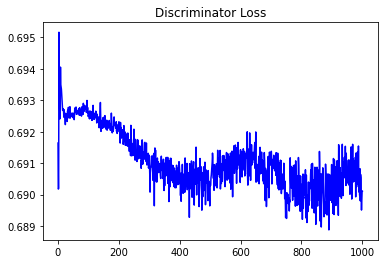

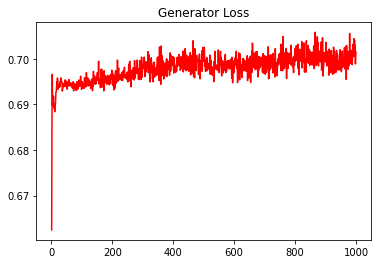

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12467887328551563


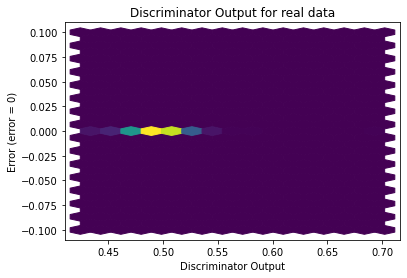

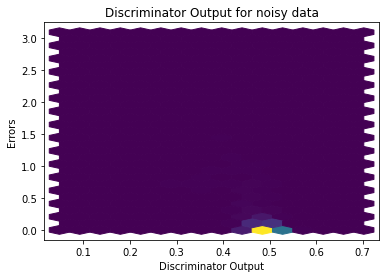

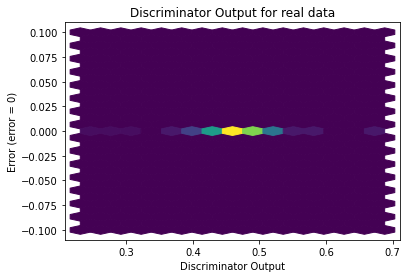

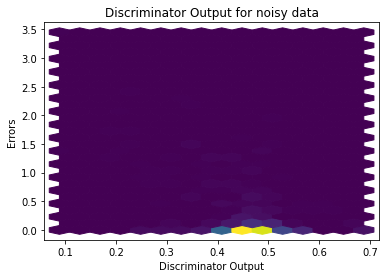

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


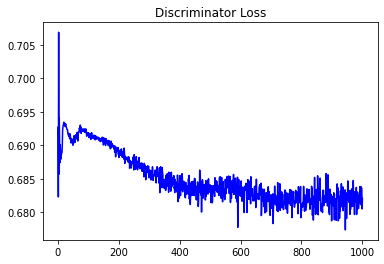

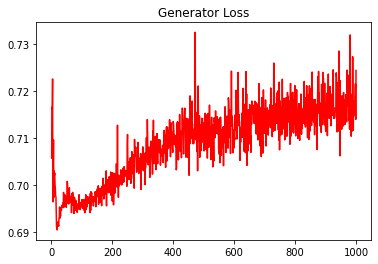

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08976925745544814


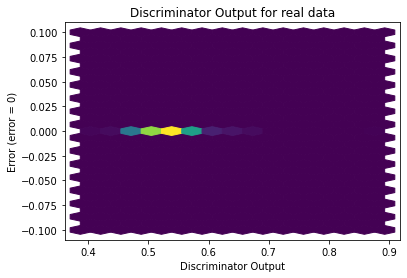

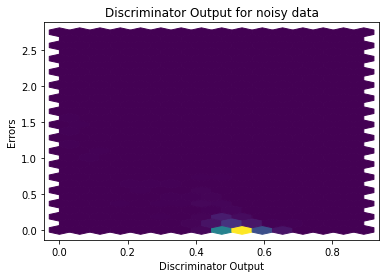

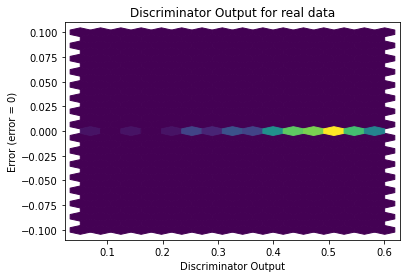

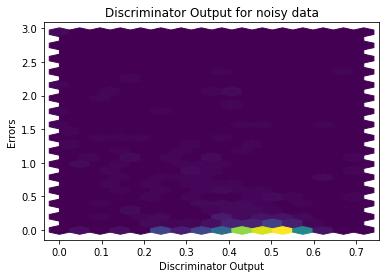

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5893]], requires_grad=True)
